**Classification: The Breast Cancer dataset**

**Import packages**

In [127]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib as plt
# Seaborn for plotting and styling
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

**Read data**

In [91]:
warnings.filterwarnings("ignore")
pd.set_option('display.precision', 3)
pd.set_option("display.max_columns", None)
pd.option_context('mode.use_inf_as_na', True)
Bc=sklearn.datasets.load_breast_cancer()

**Get Column names for features and create a df for the target value**

In [59]:
cols=Bc.feature_names
tv=pd.DataFrame(data=Bc.target,columns=['Outcome'])

**Create a dataframe for the features**

In [60]:
df=pd.DataFrame(data=Bc.data,columns=cols)

**Dimensions of the dataset**

In [61]:
print(df.shape)
print(df.dtypes)

(569, 30)
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symm

As we see from the output every feature is of datatype float64.Features are 30 and instances are 569.

**Check target value**

In [62]:

print(tv.dtypes)

Outcome    int32
dtype: object


Target value is of type int 

**Peak at Data (Features)**

In [63]:
print(df.head(5))


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0            0.118   
1        20.57         17.77          132.90     1326.0            0.085   
2        19.69         21.25          130.00     1203.0            0.110   
3        11.42         20.38           77.58      386.1            0.142   
4        20.29         14.34          135.10     1297.0            0.100   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.278           0.300                0.147          0.242   
1             0.079           0.087                0.070          0.181   
2             0.160           0.197                0.128          0.207   
3             0.284           0.241                0.105          0.260   
4             0.133           0.198                0.104          0.181   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                

Peak at Data (Target value)

In [64]:
print(tv.head(5))

   Outcome
0        0
1        0
2        0
3        0
4        0


Statistical summary of all attributes

In [65]:
print(df.describe())

       mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
count      569.000       569.000         569.000    569.000          569.000   
mean        14.127        19.290          91.969    654.889            0.096   
std          3.524         4.301          24.299    351.914            0.014   
min          6.981         9.710          43.790    143.500            0.053   
25%         11.700        16.170          75.170    420.300            0.086   
50%         13.370        18.840          86.240    551.100            0.096   
75%         15.780        21.800         104.100    782.700            0.105   
max         28.110        39.280         188.500   2501.000            0.163   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count           569.000         569.000              569.000        569.000   
mean              0.104           0.089                0.049          0.181   
std               0.053           0.080   

At first glance we can see that all attributes have the same count, so we have no missing data.
Attributes differ in scale and theer are attributes that maximum value is well above Q3.

In [66]:
df.skew()

mean radius                0.942
mean texture               0.650
mean perimeter             0.991
mean area                  1.646
mean smoothness            0.456
mean compactness           1.190
mean concavity             1.401
mean concave points        1.171
mean symmetry              0.726
mean fractal dimension     1.304
radius error               3.089
texture error              1.646
perimeter error            3.444
area error                 5.447
smoothness error           2.314
compactness error          1.902
concavity error            5.110
concave points error       1.445
symmetry error             2.195
fractal dimension error    3.924
worst radius               1.103
worst texture              0.498
worst perimeter            1.128
worst area                 1.859
worst smoothness           0.415
worst compactness          1.474
worst concavity            1.150
worst concave points       0.493
worst symmetry             1.434
worst fractal dimension    1.663
dtype: flo

Skewness between attributes differs

**Class distribution**

In [67]:
tv.groupby('Outcome').size()

Outcome
0    212
1    357
dtype: int64

Classes are 2 ,somewhat ballanced. So we have a binary classification problem with a balanced dataset.
Although ballanced the Outcome is Breast cancer.That means that false negative has catastrophic concequenses on the patient.For that reason accuracy will not be a sufficient metric for model performance

**Correlaction between attributes**

In [68]:
df.corr(method='pearson')


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-3.116e-01,6.791e-01,-0.097,0.674,0.736,-0.223,0.206,0.194,0.376,-0.104,-0.043,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
mean texture,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-7.644e-02,2.759e-01,0.386,0.282,0.260,0.007,0.192,0.143,0.164,0.009,0.054,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
mean perimeter,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-2.615e-01,6.918e-01,-0.087,0.693,0.745,-0.203,0.251,0.228,0.407,-0.082,-0.006,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
mean area,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-2.831e-01,7.326e-01,-0.066,0.727,0.800,-0.167,0.213,0.208,0.372,-0.072,-0.020,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
mean smoothness,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,5.848e-01,3.015e-01,0.068,0.296,0.247,0.332,0.319,0.248,0.381,0.201,0.284,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
mean compactness,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,5.654e-01,4.975e-01,0.046,0.549,0.456,0.135,0.739,0.571,0.642,0.230,0.507,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
mean concavity,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,3.368e-01,6.319e-01,0.076,0.660,0.617,0.099,0.670,0.691,0.683,0.178,0.449,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
mean concave points,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,1.669e-01,6.980e-01,0.021,0.711,0.690,0.028,0.490,0.439,0.616,0.095,0.258,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
mean symmetry,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,4.799e-01,3.034e-01,0.128,0.314,0.224,0.187,0.422,0.343,0.393,0.449,0.332,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438
mean fractal dimension,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000e+00,1.110e-04,0.164,0.040,-0.090,0.402,0.560,0.447,0.341,0.345,0.688,-0.254,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767


We can see attributes that are correlated but a heatmap will give us a better feel 

**Univariate Plots**

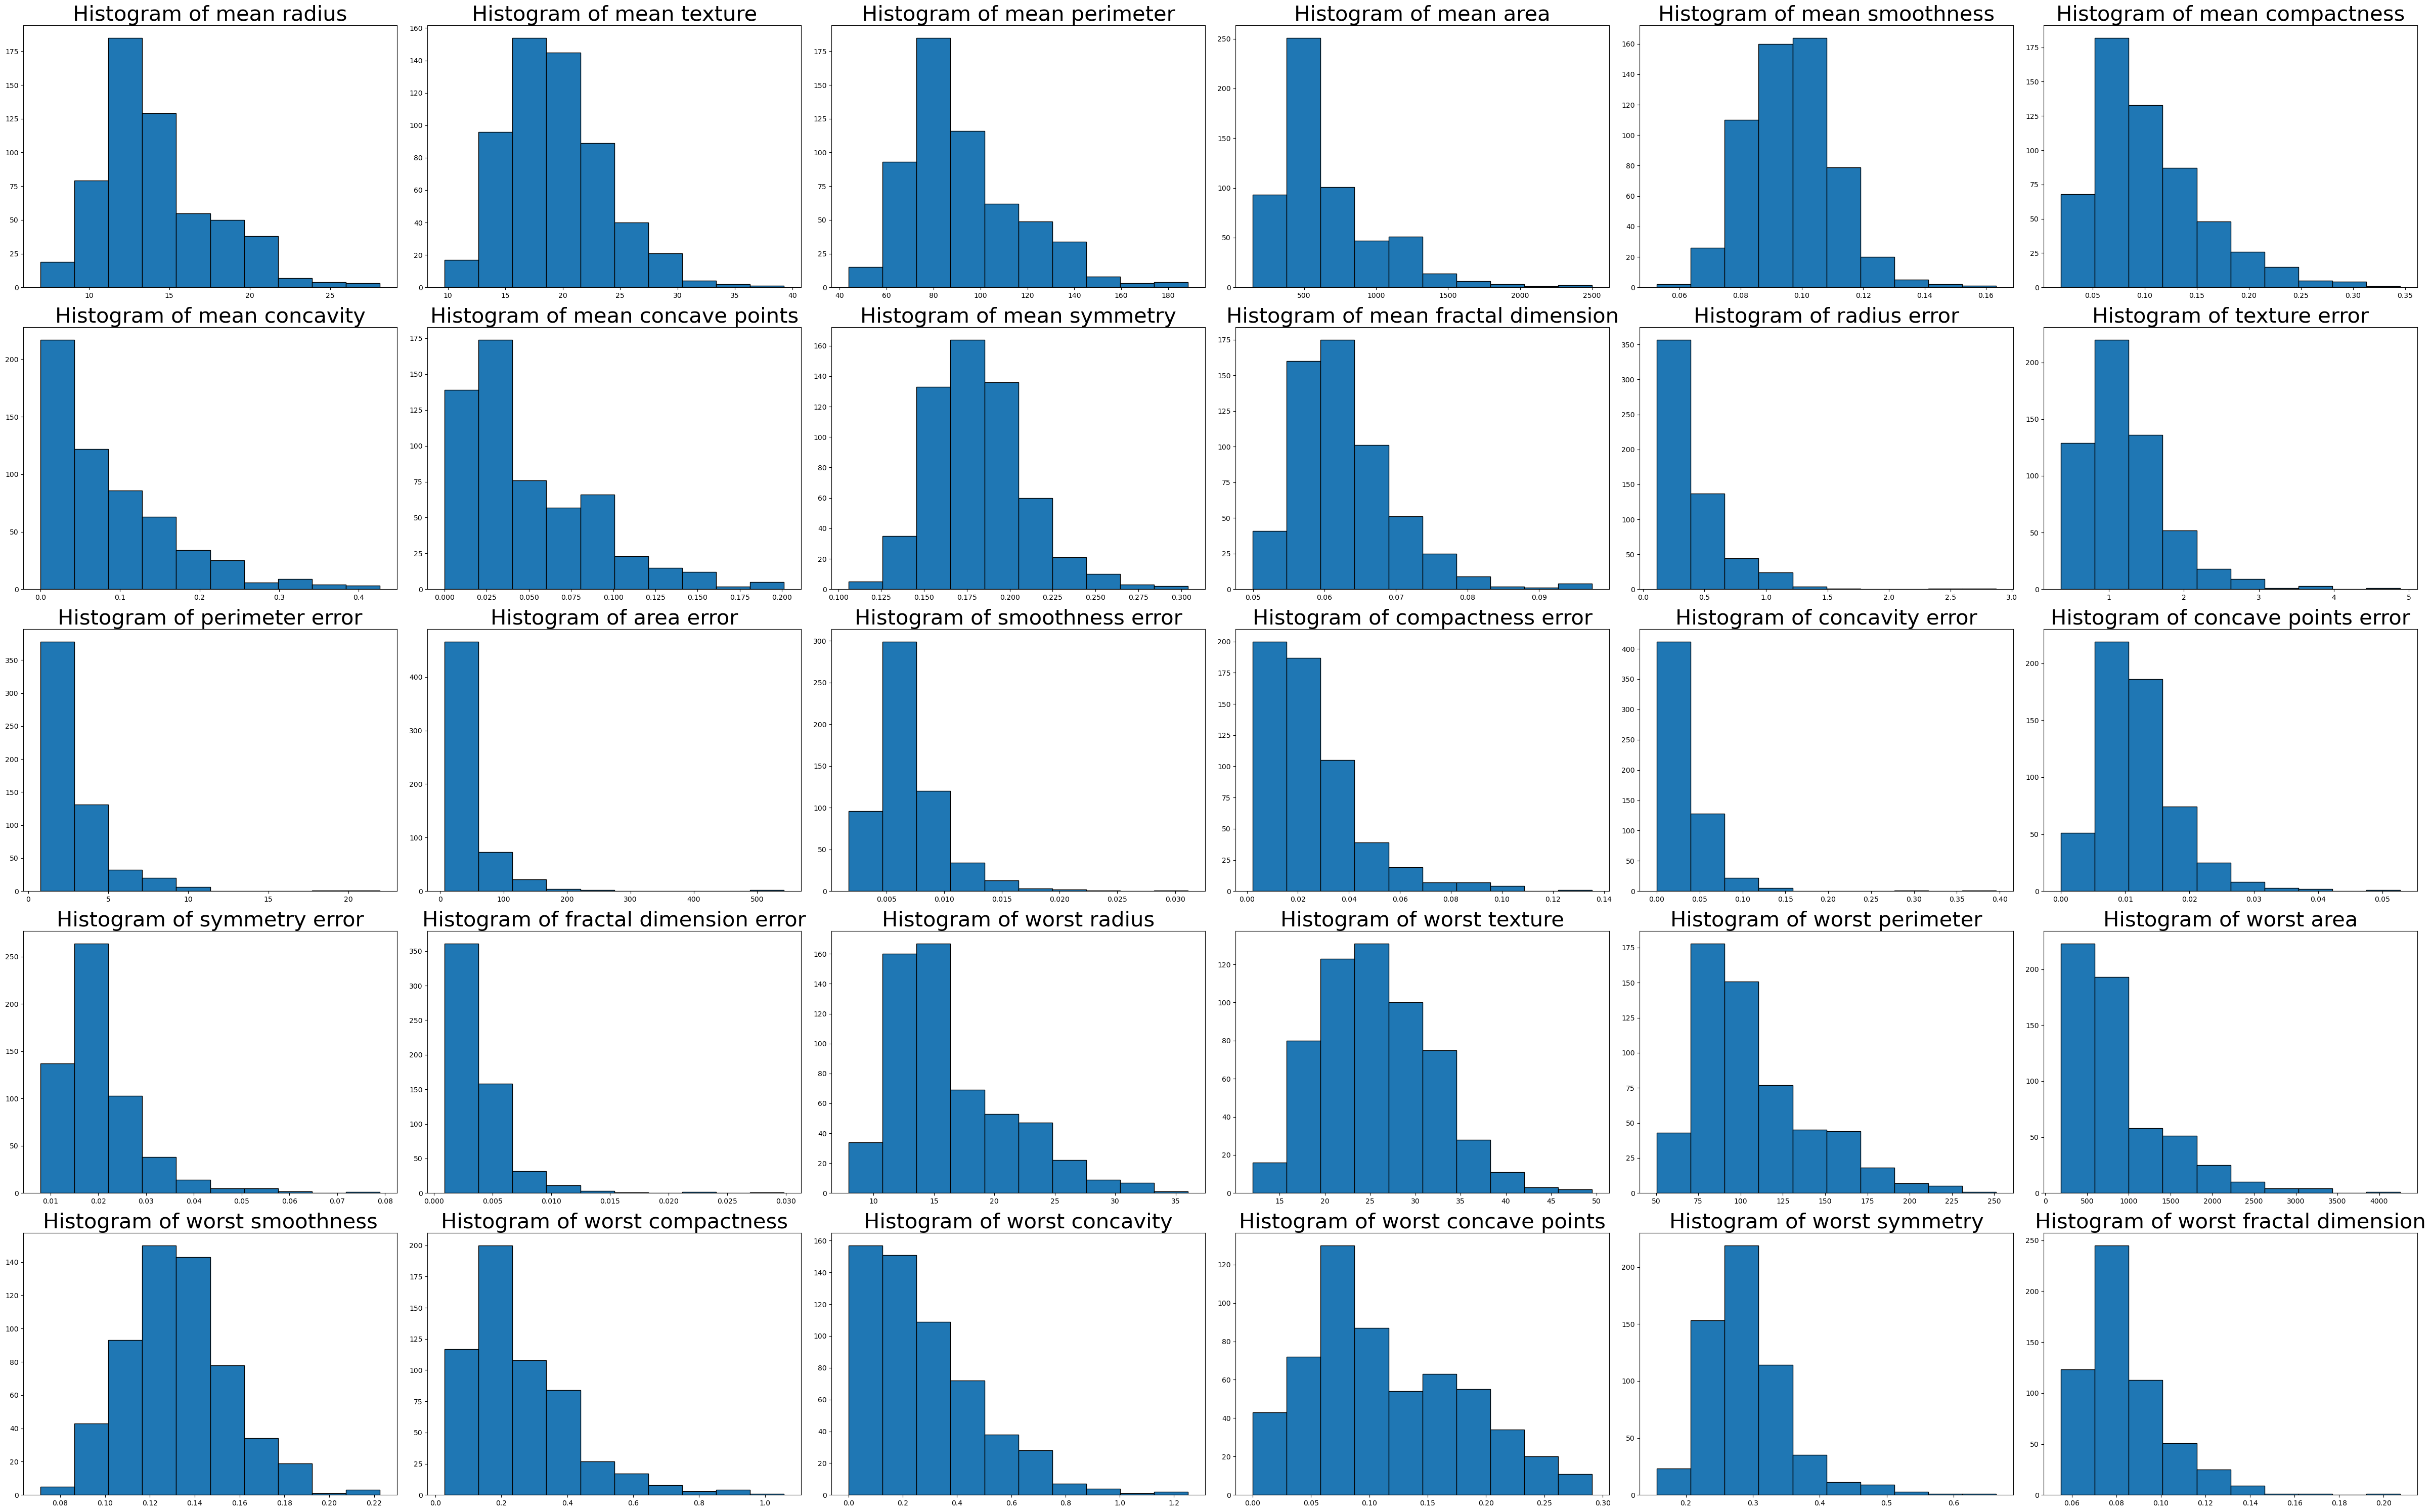

In [69]:
num_cols = len(df.columns)
#Histograms
# Calculate the number of rows and columns for a square-like layout
cols = int(np.ceil(np.sqrt(num_cols)))  # Number of columns in the grid
rows = int(np.ceil(num_cols / cols))  # Number of rows needed

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(8 * cols, 6 * rows))

# Flatten axes to easily iterate over them
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=10, edgecolor='black')
    axes[i].set_title(f"Histogram of {column}", fontsize=30)  # Set smaller font size for title
    

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout for better spacing
plt.tight_layout()


# Show the plot
plt.show()


All most features have a single mode.Skewness differs between features.


**Density plots**

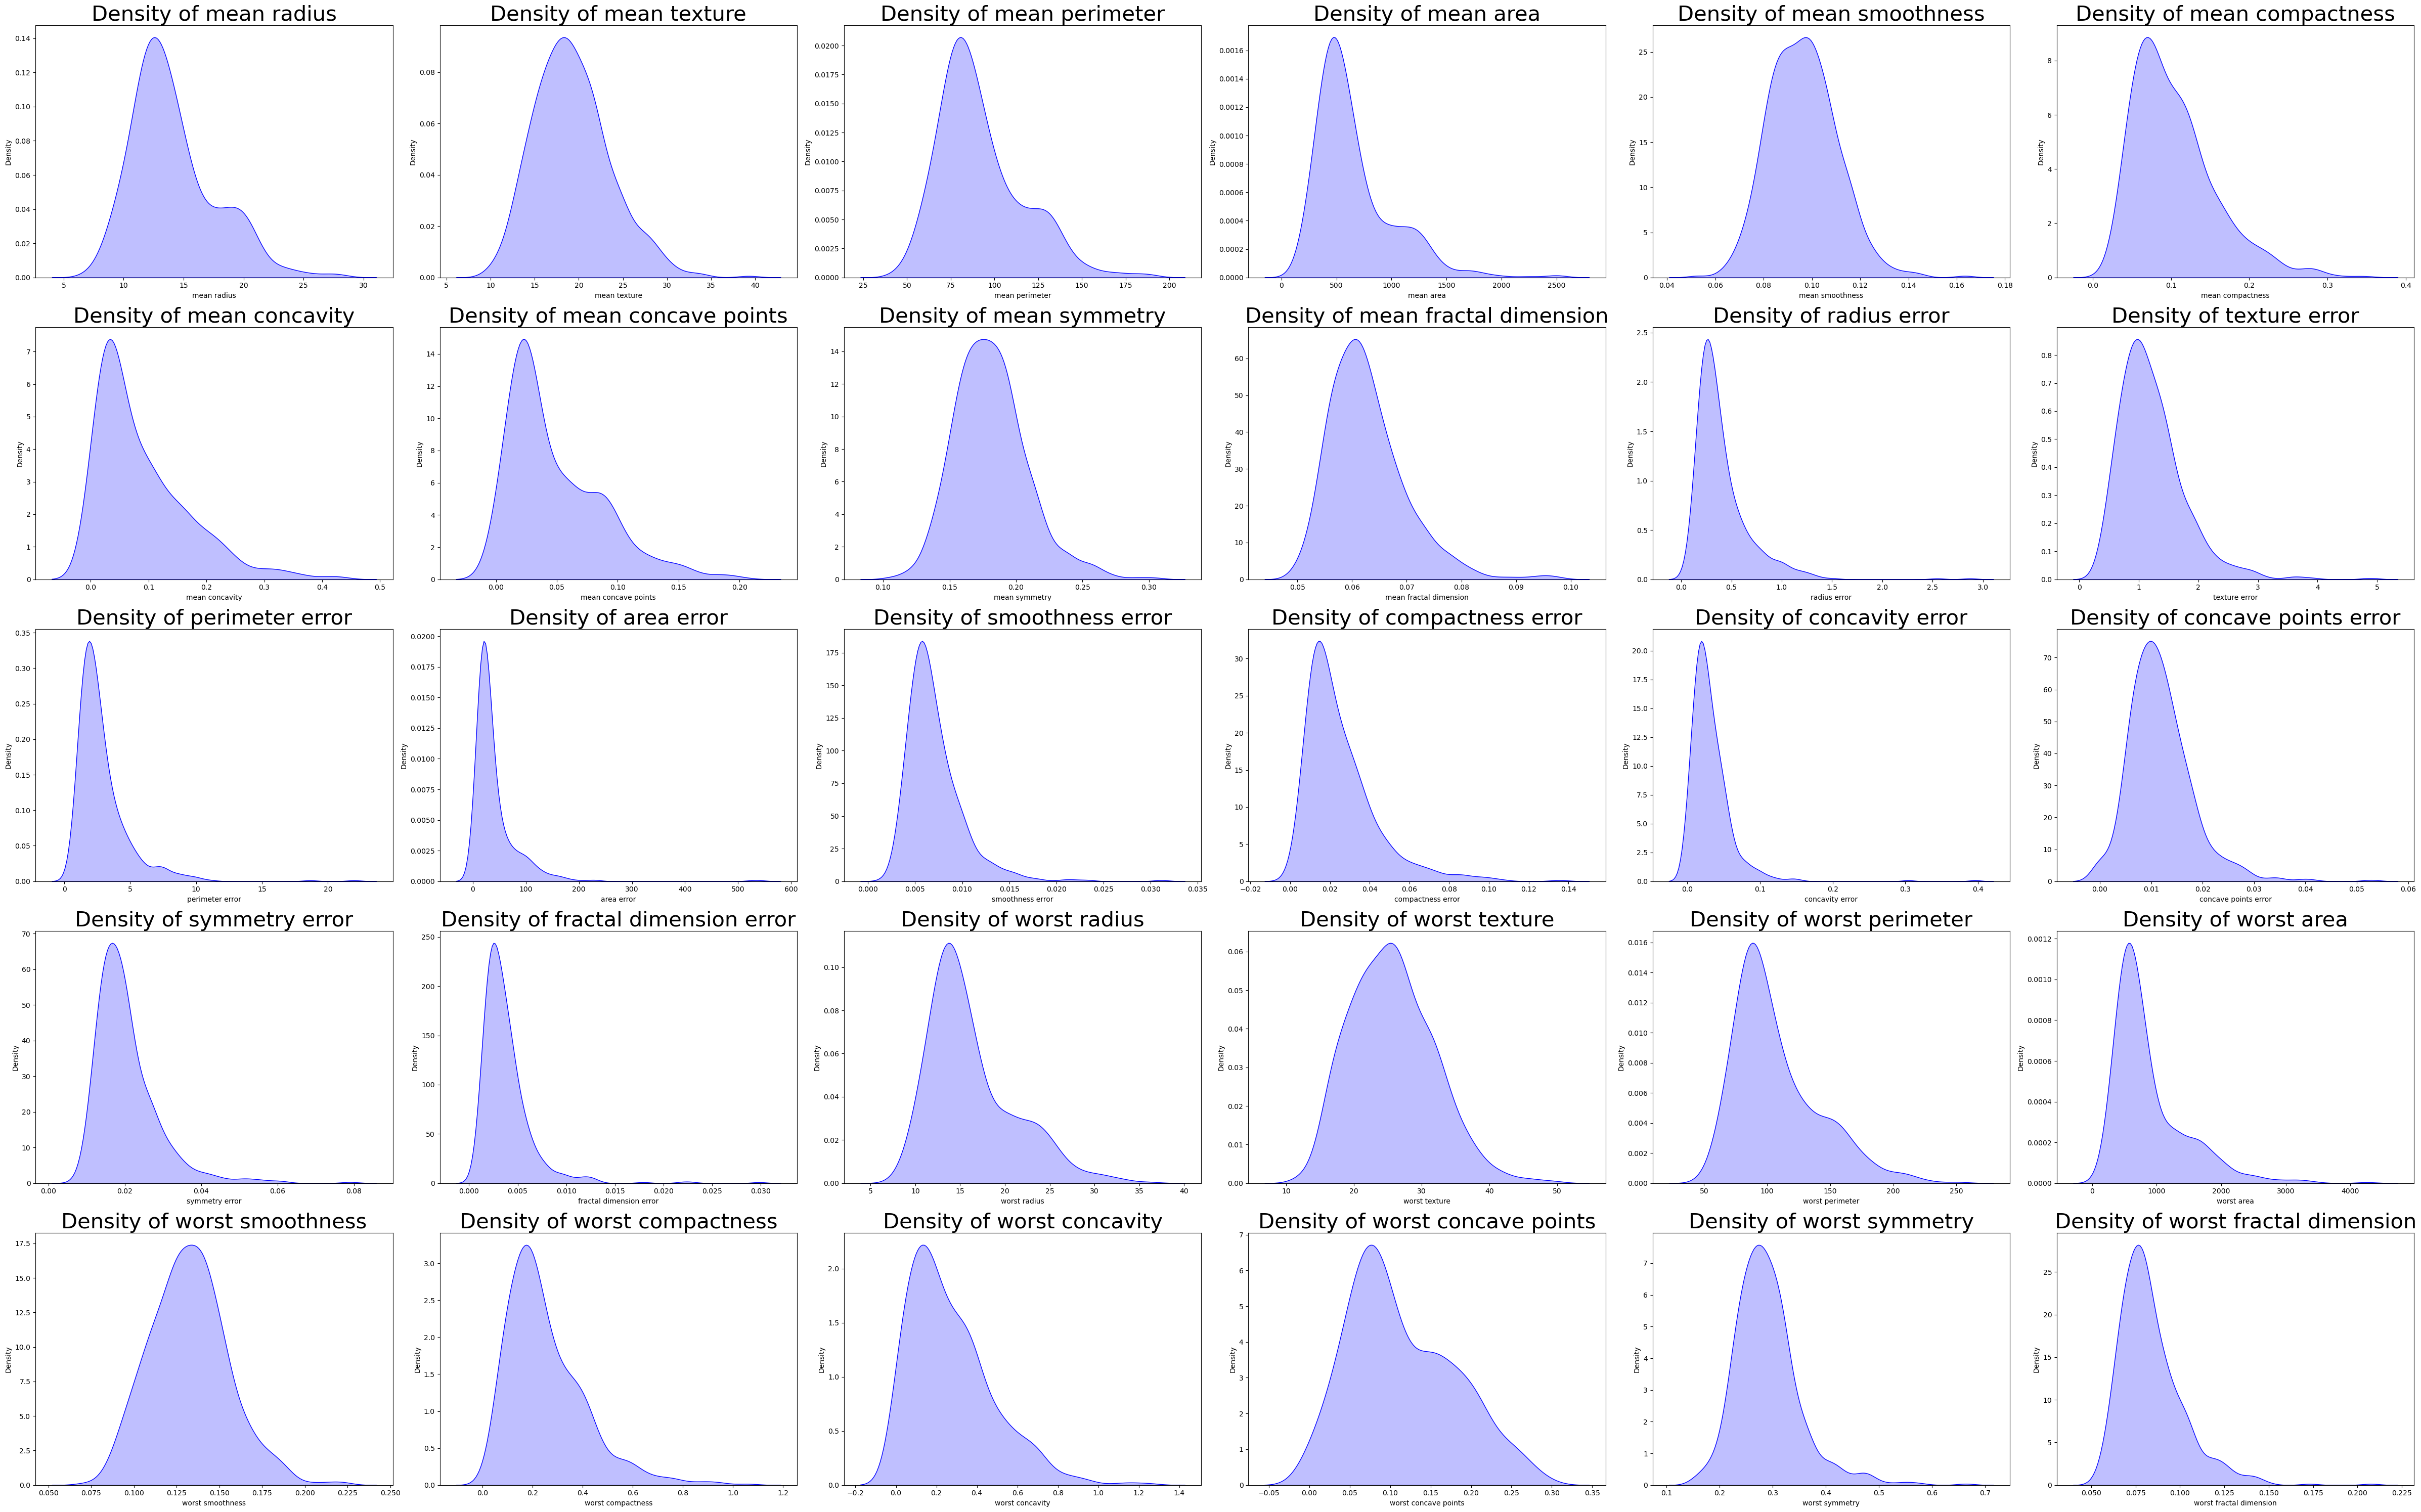

In [72]:

#Ingore warnings for noisy seaborn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(8 * cols, 6 * rows))

# Flatten axes to easily iterate over them
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df.columns):
    sns.kdeplot(df[column],ax=axes[i], fill=True, color="blue")
    axes[i].set_title(f"Density of {column}", fontsize=30)  # Set smaller font size for title
    

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout for better spacing
plt.tight_layout()


# Show the plot
plt.show()

**Box plots**

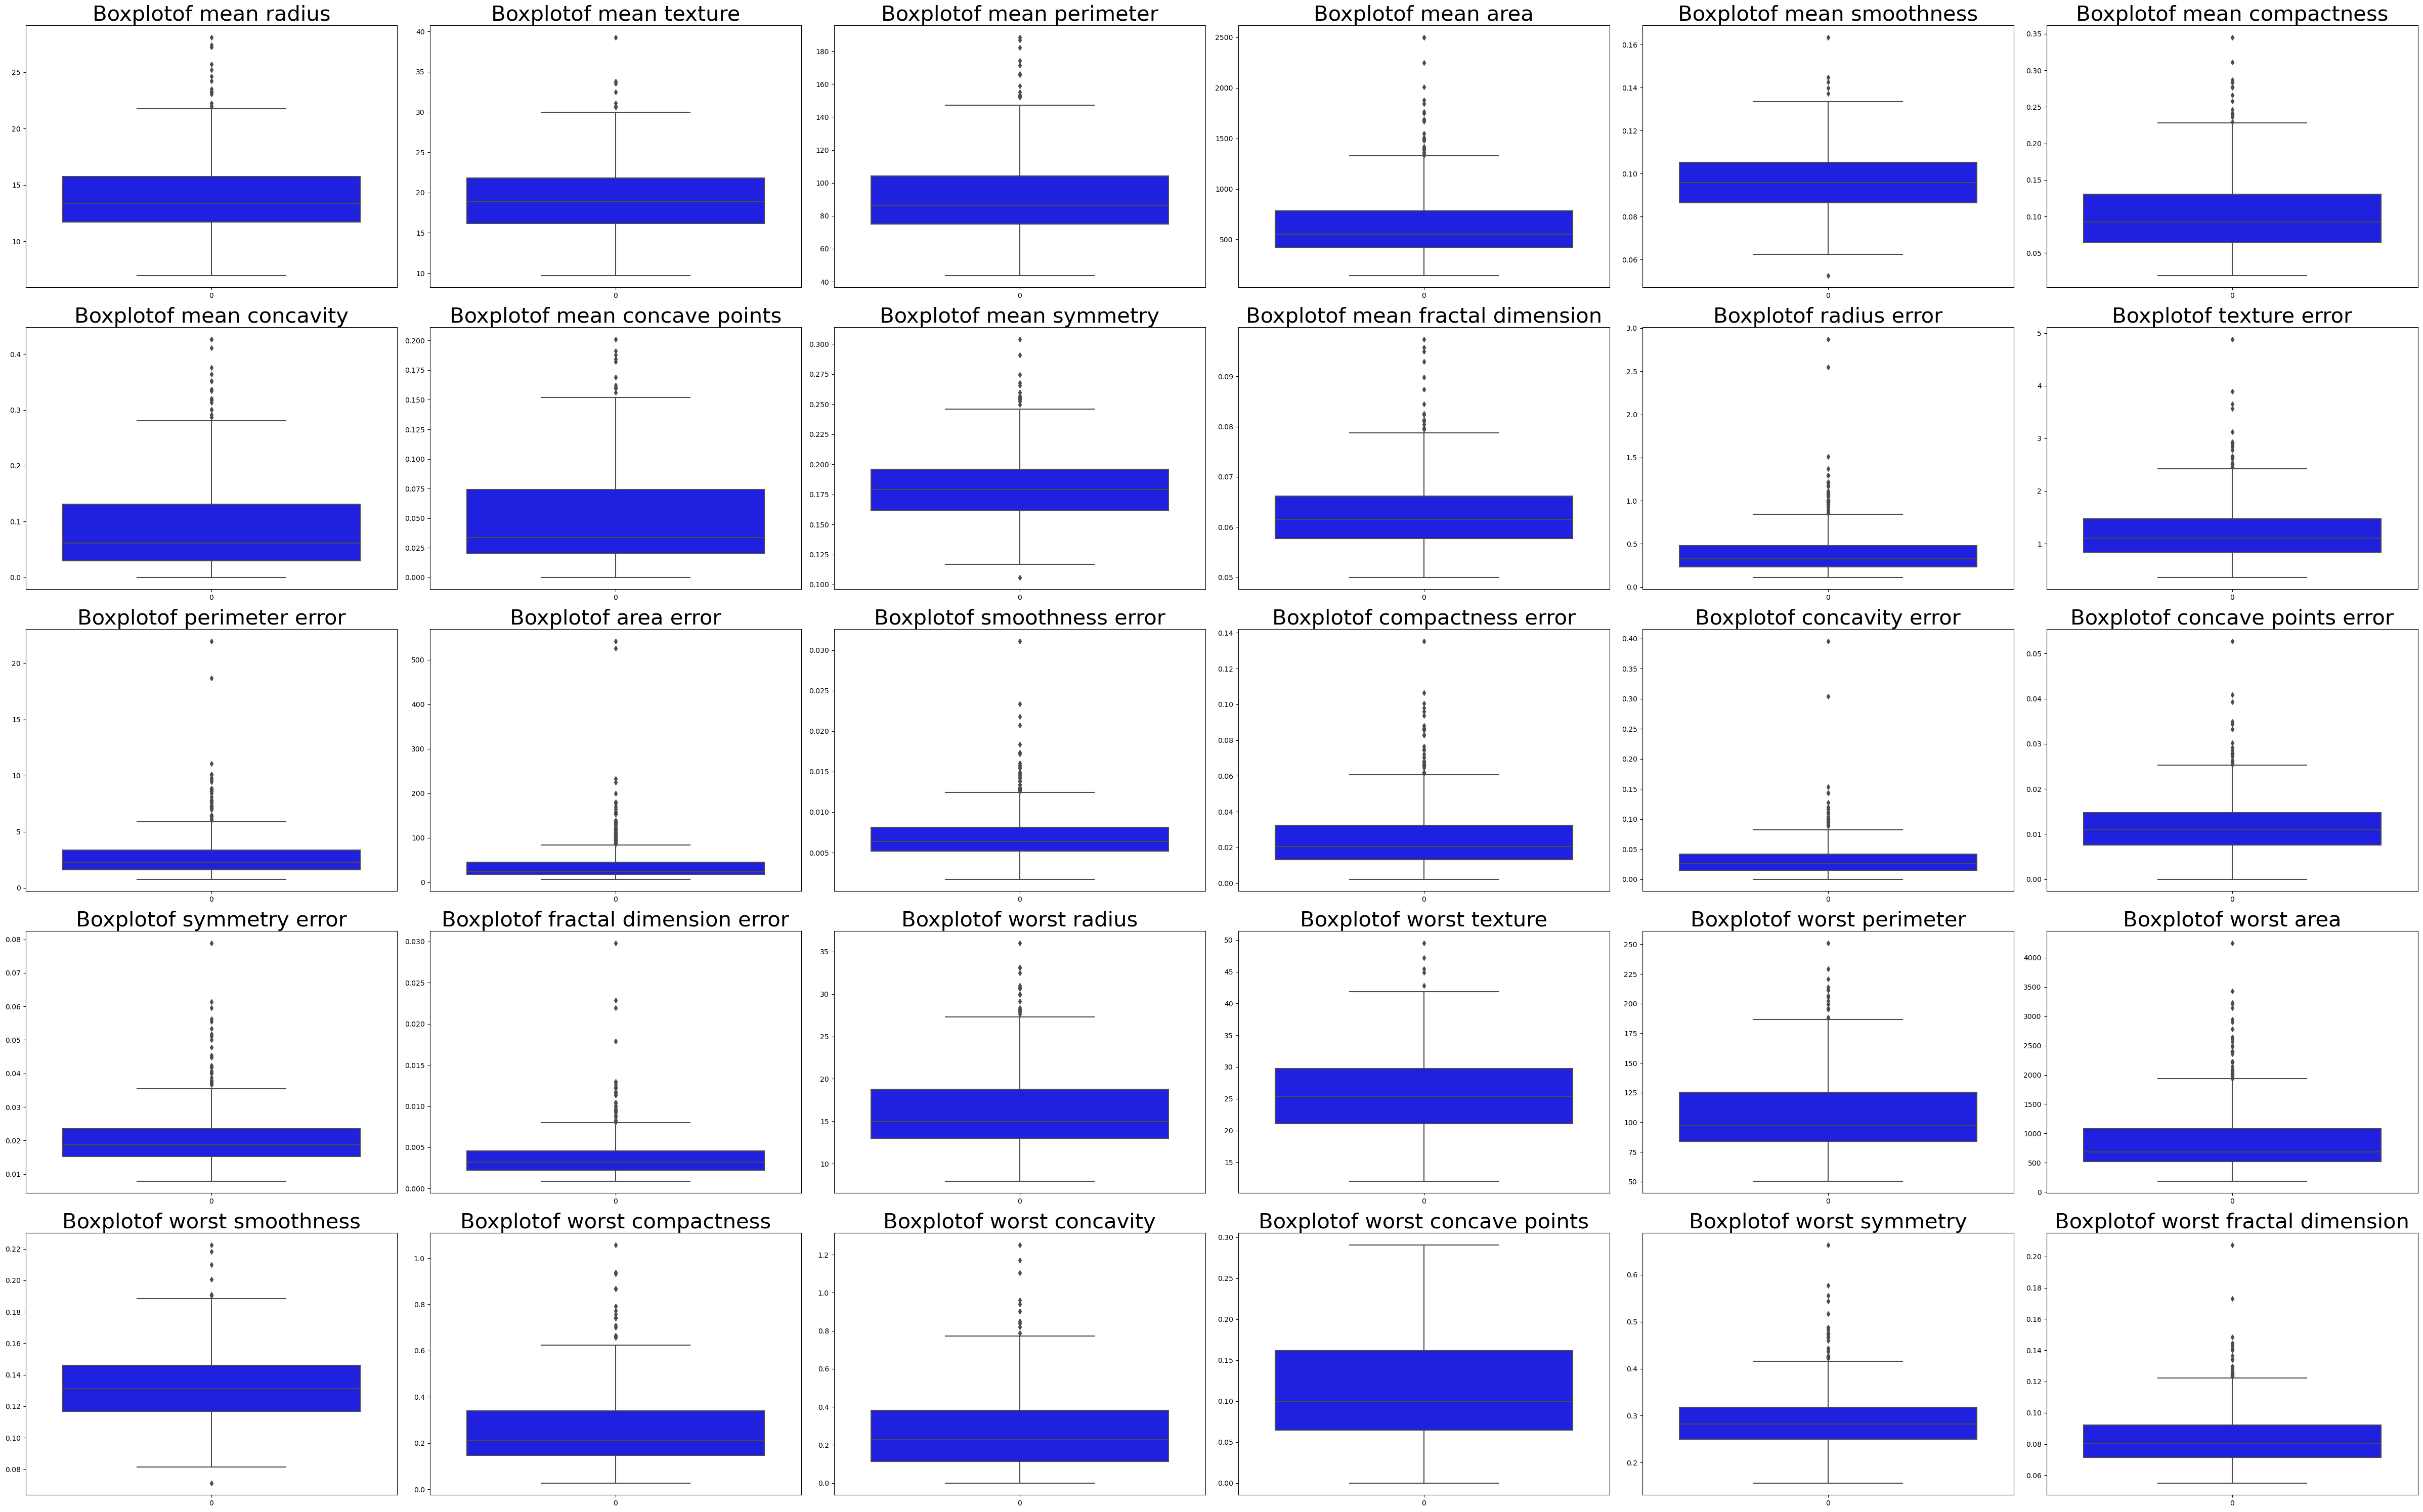

In [73]:
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(8 * cols, 6 * rows))

# Flatten axes to easily iterate over them
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df.columns):
    sns.boxplot(df[column],ax=axes[i], color="blue")
    axes[i].set_title(f"Boxplotof {column}", fontsize=30)  # Set smaller font size for title
    

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout for better spacing
plt.tight_layout()



# Show the plot
plt.show()


Strong skewness of some attributes results in instances well above the IQR.
Furthermore the presence of outliers is evident.

**Altogether**

<Axes: >

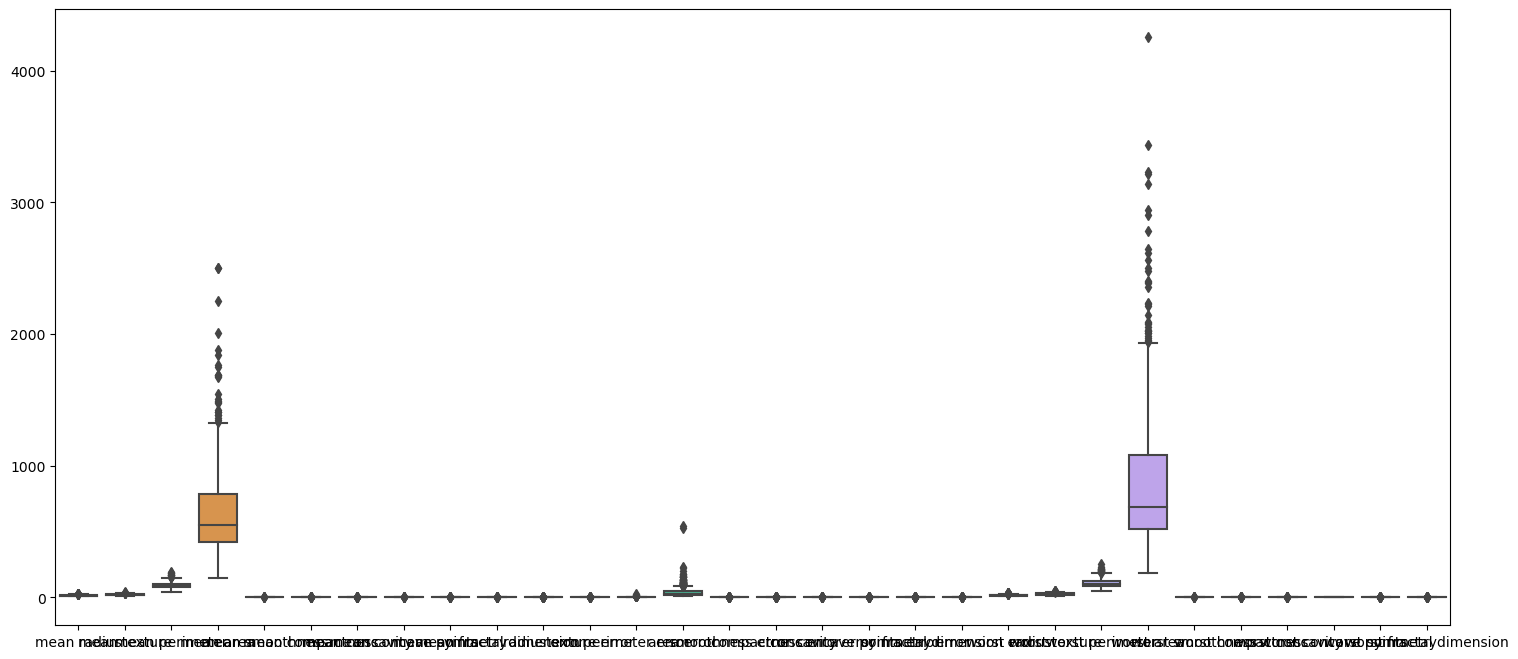

In [80]:
f = plt.figure(figsize=(18,8))
sns.boxplot(data=df)

Difference in scale is evident

Removing features with values above 5 times their IQR and plotting again we have .

<Axes: >

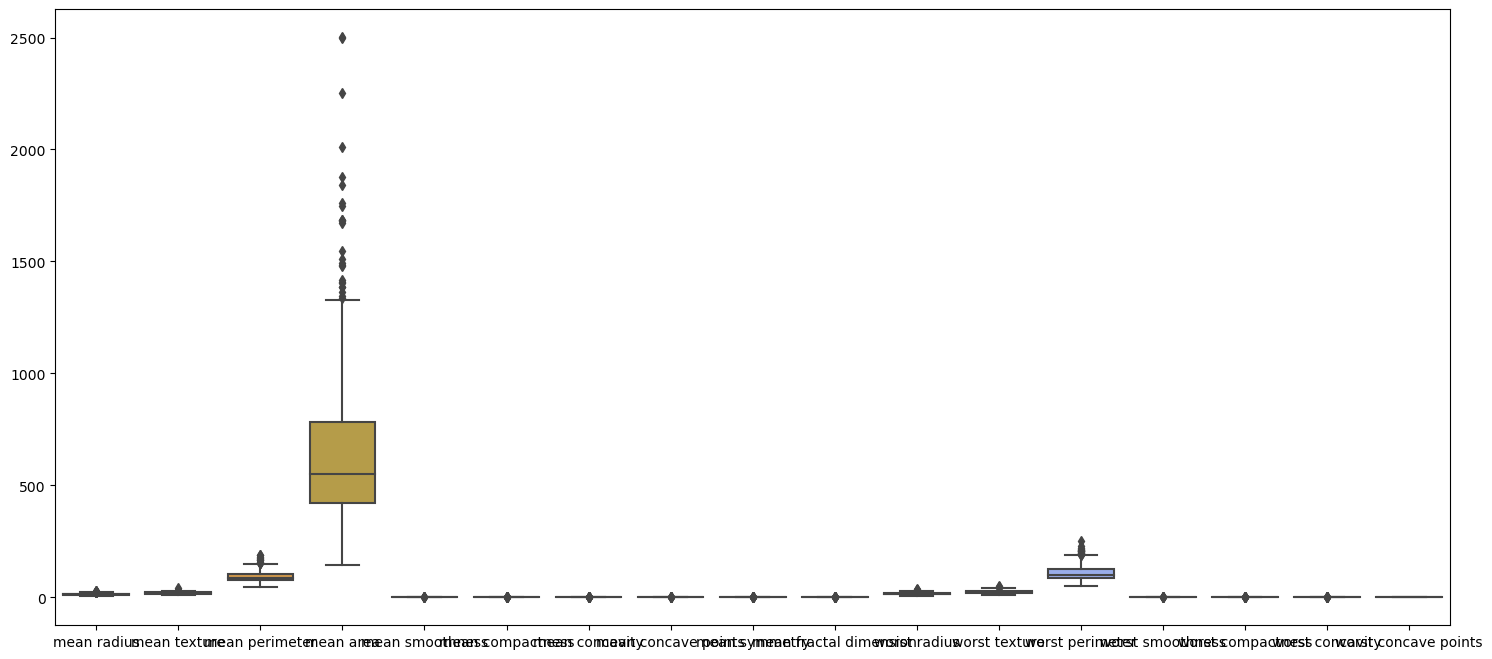

In [92]:

#Remove
description=df.describe()
description[description.index=='75%'].values-description[description.index=='25%'].values
description.loc['IQR',:]=description[description.index=='75%'].values-description[description.index=='25%'].values
description.loc['Upper Fence',:]=description[description.index=='75%'].values + 5* description[description.index=='IQR'].values
description.loc['Outlier flag',:]=description[description.index=='Upper Fence'].values < description[description.index=='max'].values
columns_to_drop = description.loc[:, description.loc['Outlier flag'] == True].columns

stats_df = df.drop(columns_to_drop, axis=1)
#All but the problematic
f = plt.figure(figsize=(18,8))
sns.boxplot(data=stats_df)

And the plot of the removed features

<Axes: >

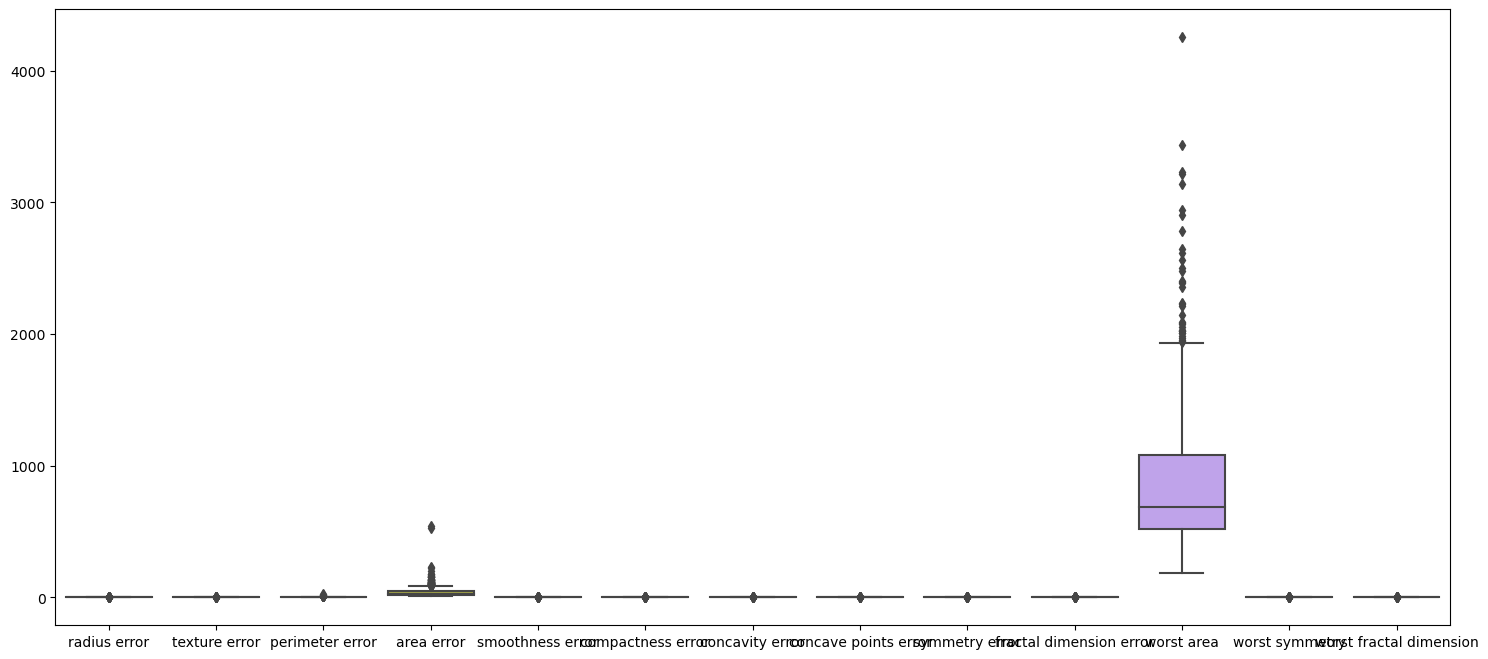

In [93]:
f = plt.figure(figsize=(18,8))
sns.boxplot(data=df[columns_to_drop])


Even after removing a large number of features ,we have a difference in scale between features. That means that we need to rescale the data.


**Corelation matrix**

<Axes: >

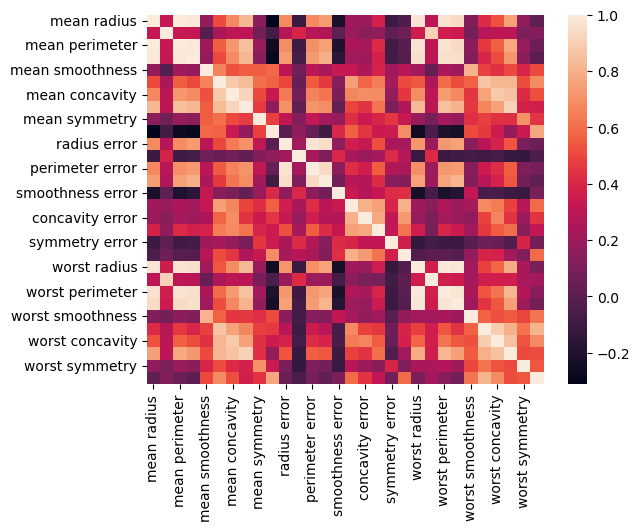

In [95]:
correlations = df.corr()
sns.heatmap(correlations)


Features are correlated. A pair grid will give us a better idea.

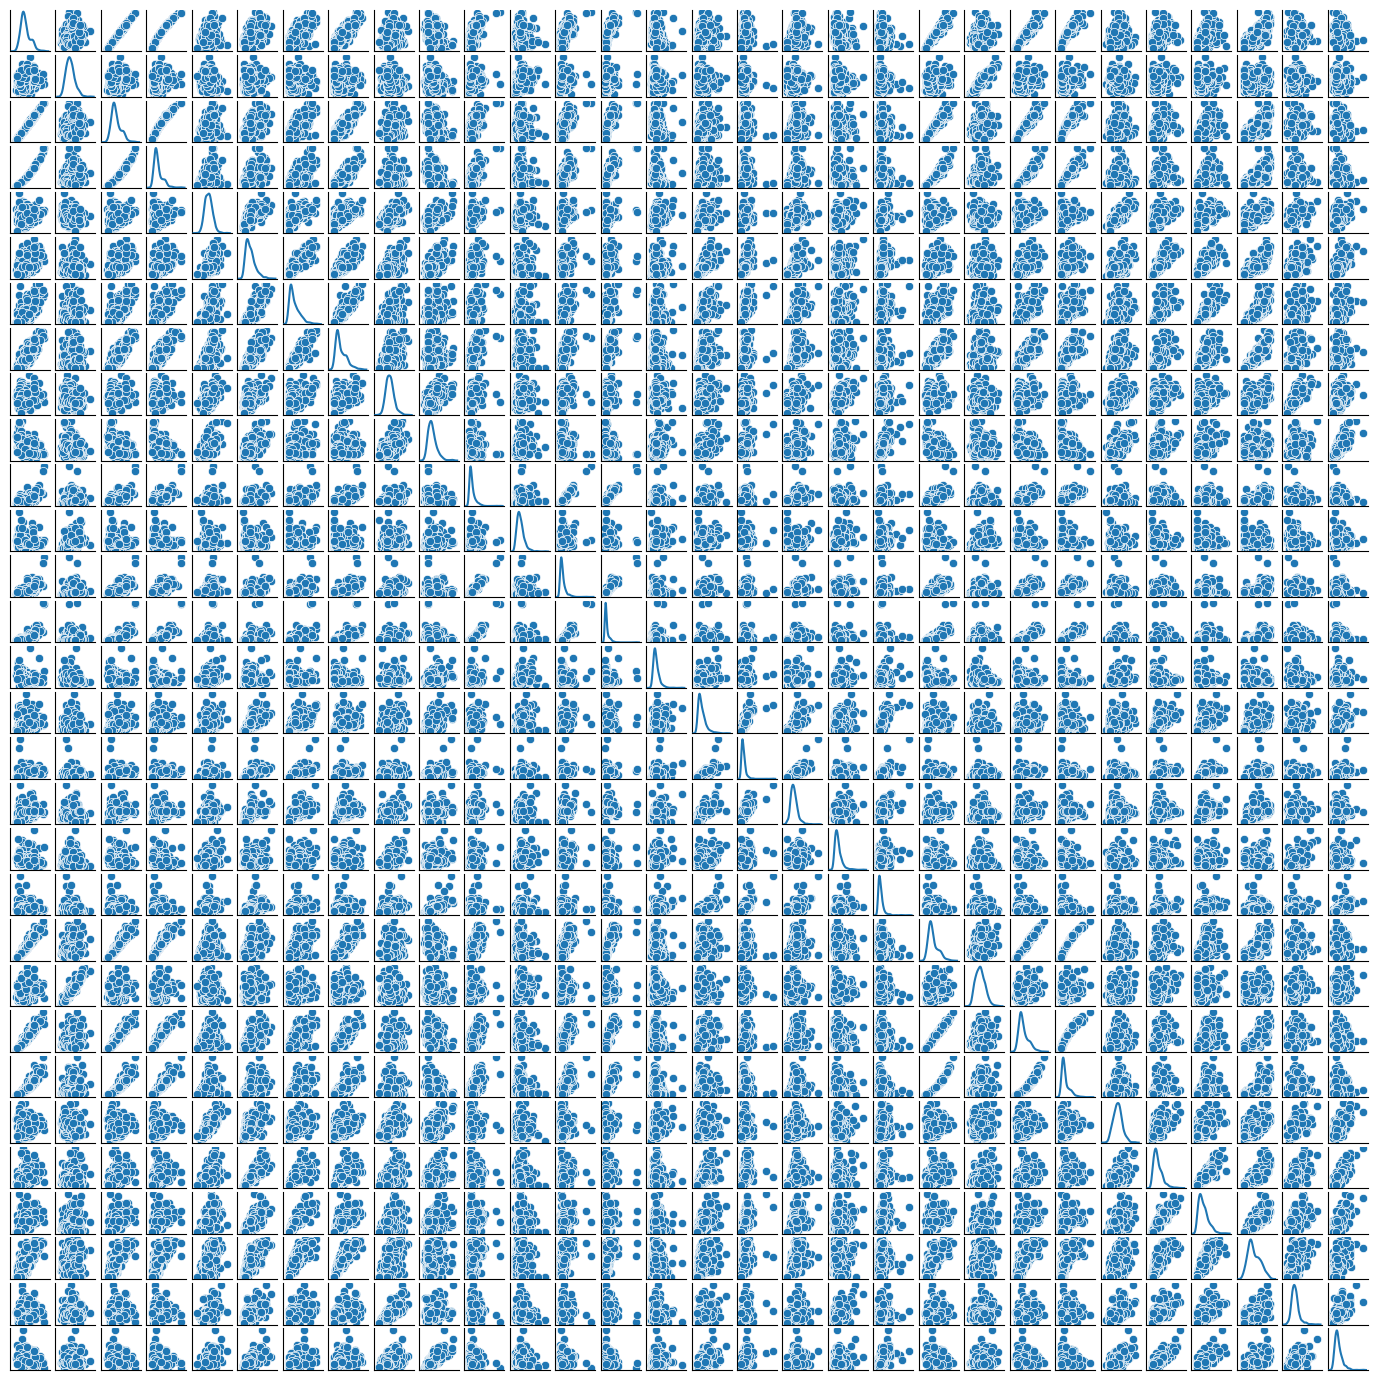

In [96]:
##Pair Grid(Runs slow)
g = sns.PairGrid(df, diag_sharey=False)
g.map_offdiag(sns.scatterplot)  # Scatter plots for off-diagonal
g.map_diag(sns.kdeplot) 

for ax in g.axes.flat:
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust figure size
g.fig.set_size_inches(14, 14)

plt.show()

It is clear that there is correlation between features as there are subplots that show pairs that increase together.

**Algorithms**

Data is split in 5 splits.Features are stored in array X and target value in array Y.
A list of scalers is created containing:  None,Normalizer(),MinMaxScaler(feature_range=(0, 1)),StandardScaler().
A list of models is created containing: LogisticRegression(solver='liblinear'), DecisionTreeClassifier(), GaussianNB(),LinearDiscriminantAnalysis().
Every model - scaler pair is fit and evaluated in 5-fold cross evaluation. Means and stds of Results are stored in a dataframe with index the name of the model and column names the names of the scalers.Models are evaluated with accuracy and f1 score.

In [98]:
kfold = KFold(n_splits=5)




X = np.array(df.values)
Y=np.array(tv).ravel()

#Search between models and scalers
scalers=[None,Normalizer(),MinMaxScaler(feature_range=(0, 1)),StandardScaler()]
models=[LogisticRegression(solver='liblinear'), DecisionTreeClassifier(), GaussianNB(),LinearDiscriminantAnalysis()]
resultsdfac=pd.DataFrame()
resultsstdac=pd.DataFrame()

resultsdff1=pd.DataFrame()
resultsstdf1=pd.DataFrame()



for model in models :
    for scaler in scalers :
        if scaler :
            X_1=scaler.fit_transform(X)
        else:
            X_1 = X
            
        r1 = cross_val_score(model, X_1, Y, cv=kfold,scoring='accuracy')      
        resultsdfac.loc[model.__class__.__name__,scaler.__class__.__name__]=r1.mean()  
        resultsstdac.loc[model.__class__.__name__,scaler.__class__.__name__]=r1.std() 
        
      
        r1 = cross_val_score(model, X_1, Y, cv=kfold,scoring='f1')      
        resultsdff1.loc[model.__class__.__name__,scaler.__class__.__name__]=r1.mean()  
        resultsstdf1.loc[model.__class__.__name__,scaler.__class__.__name__]=r1.std() 


Mean and Standard Deviation of Results for accuracy :

In [99]:
print(resultsdfac)
print(resultsstdac)

                            NoneType  Normalizer  MinMaxScaler  StandardScaler
LogisticRegression             0.953       0.763         0.954           0.977
DecisionTreeClassifier         0.910       0.921         0.903           0.910
GaussianNB                     0.937       0.812         0.930           0.930
LinearDiscriminantAnalysis     0.958       0.954         0.958           0.958
                            NoneType  Normalizer  MinMaxScaler  StandardScaler
LogisticRegression             0.023       0.128         0.033           0.012
DecisionTreeClassifier         0.030       0.015         0.031           0.033
GaussianNB                     0.034       0.051         0.032           0.032
LinearDiscriminantAnalysis     0.025       0.030         0.025           0.025


In [100]:
print(resultsdff1)
print(resultsstdf1)


                            NoneType  Normalizer  MinMaxScaler  StandardScaler
LogisticRegression             0.958       0.831         0.958           0.980
DecisionTreeClassifier         0.919       0.934         0.919           0.923
GaussianNB                     0.942       0.837         0.937           0.937
LinearDiscriminantAnalysis     0.962       0.959         0.962           0.962
                            NoneType  Normalizer  MinMaxScaler  StandardScaler
LogisticRegression             0.030       0.108         0.038           0.012
DecisionTreeClassifier         0.036       0.027         0.035           0.039
GaussianNB                     0.044       0.028         0.043           0.043
LinearDiscriminantAnalysis     0.030       0.032         0.030           0.030


Both in terms of accuracy and f1 score logistic regretion with standard scaled data outperform every other combination of model-scaler, so that will be the model of choice for hyperparameter optimisation.Since the nature of the problem is very sensitive to false negative the metric of choice will be f1 score in order to incorporate recall in evaluation.

**Hyperparameter Optimisation**

Hyperparameter tuning will be performed with the use of random search for C,penalty,class weight and max iterations.

In [102]:
log_reg = LogisticRegression()
param_grid = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2' , 'none'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 500, 1000],
    
}
scaler=StandardScaler()
X_1=scaler.fit_transform(X)
random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_grid, 
                                   n_iter=100, scoring='f1', cv=5)

random_search.fit(X_1, Y)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [100, 200, 500, 1000],
                                        'penalty': ['l1', 'l2', 'none']},
                   scoring='f1')

In [103]:
random_search.best_params_

{'penalty': 'l2',
 'max_iter': 200,
 'class_weight': None,
 'C': 0.46415888336127775}

In [104]:
random_search.best_score_

0.9847303212482259

In [117]:
best_model = random_search.best_estimator_

Model of Choise is Logistic regression with l2 penalty and C:0.46.With max of 200 iterations and with no class weight.

Since standard scaler doesn't eliminate correlation,let's check how does the same model perform after the use of PCA.
Explainability of the features will be lost in the process so PCA will be selected only if it outperforms the currenctly selected combination significantly.

In [110]:

pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

random_search.fit(X_pca, Y)
print(random_search.best_score_)

0.9680539707039804


Even with 30 principal components selected PCA does not outperform the selected model-scaler choice.Logistic Regression with standard scaler is the prefered choice and its f1 score is 0.9847303212482259 

**Confusion Matrix**



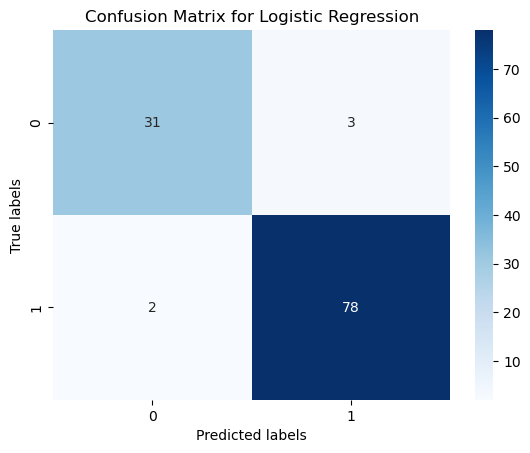

In [131]:
model=best_model


scaler=StandardScaler()
X_1=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_1, Y, test_size=0.2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
